<h1>Functional Analytics Project on Drug Review Dataset using NLP</h1>
<p>Neelesh singh</p>
<h2>Introduction</h2>
<p>In this project we tried to explore and visualize the Drug Review Dataset using NLP and Hugging Face transformers to do the sentiment analysis</p>

# About Dataset

* The Drug Review Dataset is taken from the UCI Machine Learning Repository. This Dataset provides patient reviews on specific drugs along with related conditions and a 10-star patient rating reflecting the overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. The Drug Review Data Set is of shape (161297, 7) i.e. **It has 7 features** including the review and **161297 Data Points** or entries.
* The features are 'drugName' which is the name of the drug, 'condition' which is the condition the patient is suffering from, 'review' is the patients review, 'rating' is the 10-star patient rating for the drug, 'date' is the date of the entry and the 'usefulcount' is the number of users who found the review useful.


### Attributes :
1. **drugName :** name of drug
2.**condition :** name of condition
3. **review :** patient review
4. **rating :** 10 star patient rating
5. **date :** date of review entry
6. **usefulCount :** number of users who found review useful



# Objective :

#### The Objective of this Project is to Analyse the Dataset, plot the inferences with good visualizations and answer some Questions to extract information from the Dataset.
#### Also analyse the sentiment of the drug Users, according to their reviews and various other features like the condition they are suffering from, the rating of the drug used, Date of the usage, and others.


#### *Questions*
+ Types of questions we can ask?(Drugs,Review,Rating,Conditions,Time,Genuiness,etc)
+ What is the most popular drug?
+ What are the groups/classification of drugs used?
+ Which Drug has the best review?
+ How many drugs do we have?
+ The number of drugs per condition
+ Number of patients that searched on a particular drug
+ How genuine is the review? (Using sentiment analysis)
+ How many reviews are positive,negative,neutral?
+ Correlation between rating and review and users who found the review useful
+ Can you predict the rating using the review?
+ Distribution of rating
+ Amount of review made per year and per month
+ Which condition has the most review on drugs




In [40]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [41]:
# Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
plt.style.use('fivethirtyeight')
%matplotlib inline

In [42]:
# Load Sentiment Pkgs
from textblob import TextBlob

# Loading the Datset

In [43]:
# Load Dataset
df = pd.read_csv("drugsComTrain_raw.csv")
pd.DataFrame(df)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [44]:
# Preview Dataset
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


# Data Exploration

In [45]:
# Columns
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [46]:
# Missing Values
df.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

#### Observation :

+ Most of the missing values are in the condition column
+ This implies that most people don't know their condition by name or privacy

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,161297.0,115923.585305,67004.445170,2.0,58063.0,115744.0,173776.0,232291.0
rating,161297.0,6.994377,3.272329,1.0,5.0,8.0,10.0,10.0
usefulCount,161297.0,28.004755,36.403742,0.0,6.0,16.0,36.0,1291.0


In [48]:
df.info()
print('=============='*10)
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

# EDA and Data Visualization


### -- How many drugs do we have?

In [49]:
# How many drugs do we have?
num = len(df['drugName'].unique().tolist())
print('The number of Drugs are:',num )

The number of Drugs are: 3436


###  --- What are the Most popular Drug?

In [50]:
# What is the most popular drug?
# Top 20 Drugs (Most Popular)
df['drugName'].value_counts().nlargest(20)

drugName
Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Medroxyprogesterone                    995
Citalopram                             995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: count, dtype: int64

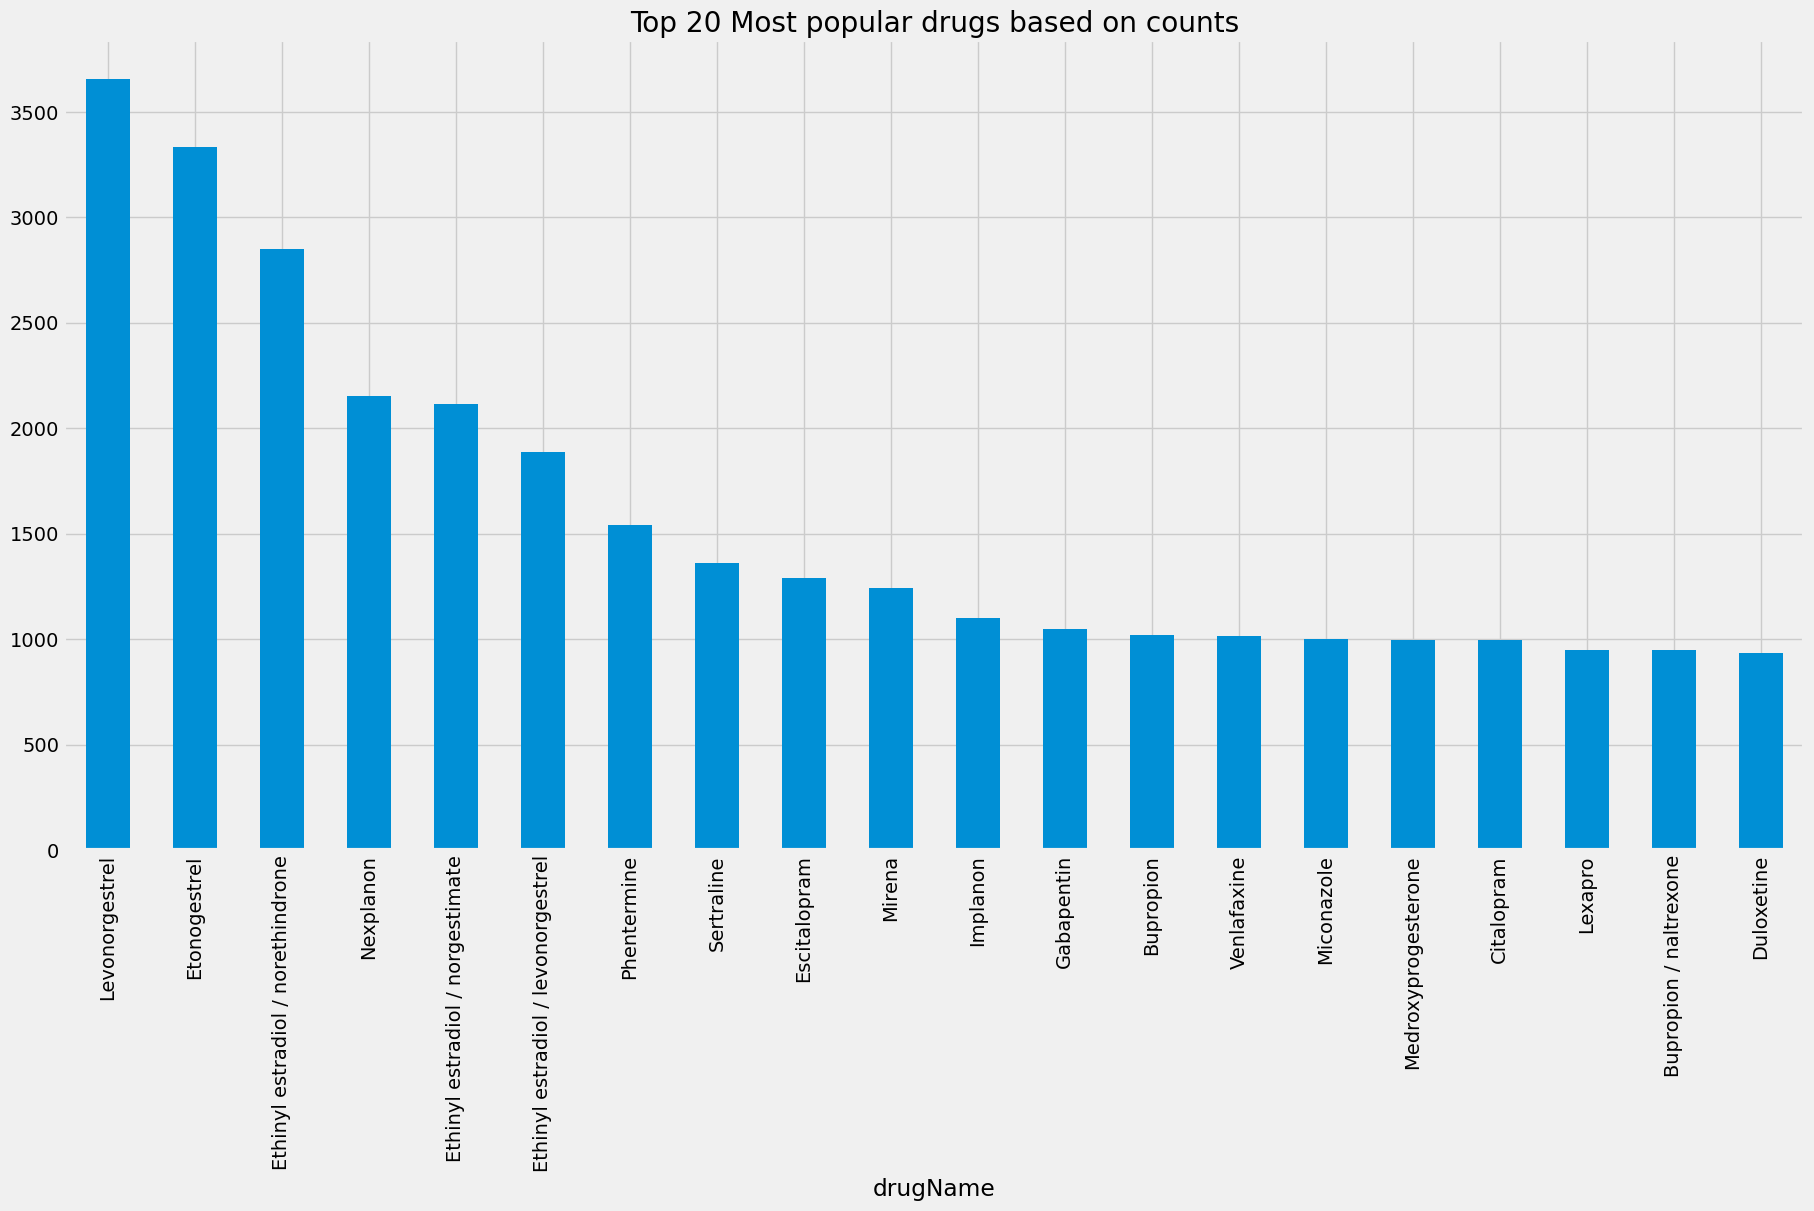

In [51]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

#### Observation
+ Most of the commonest drugs are hormonal drugs


C:\Users\Asus\AppData\Local\Temp\ipykernel_13848\2539349515.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'BuPu_r')


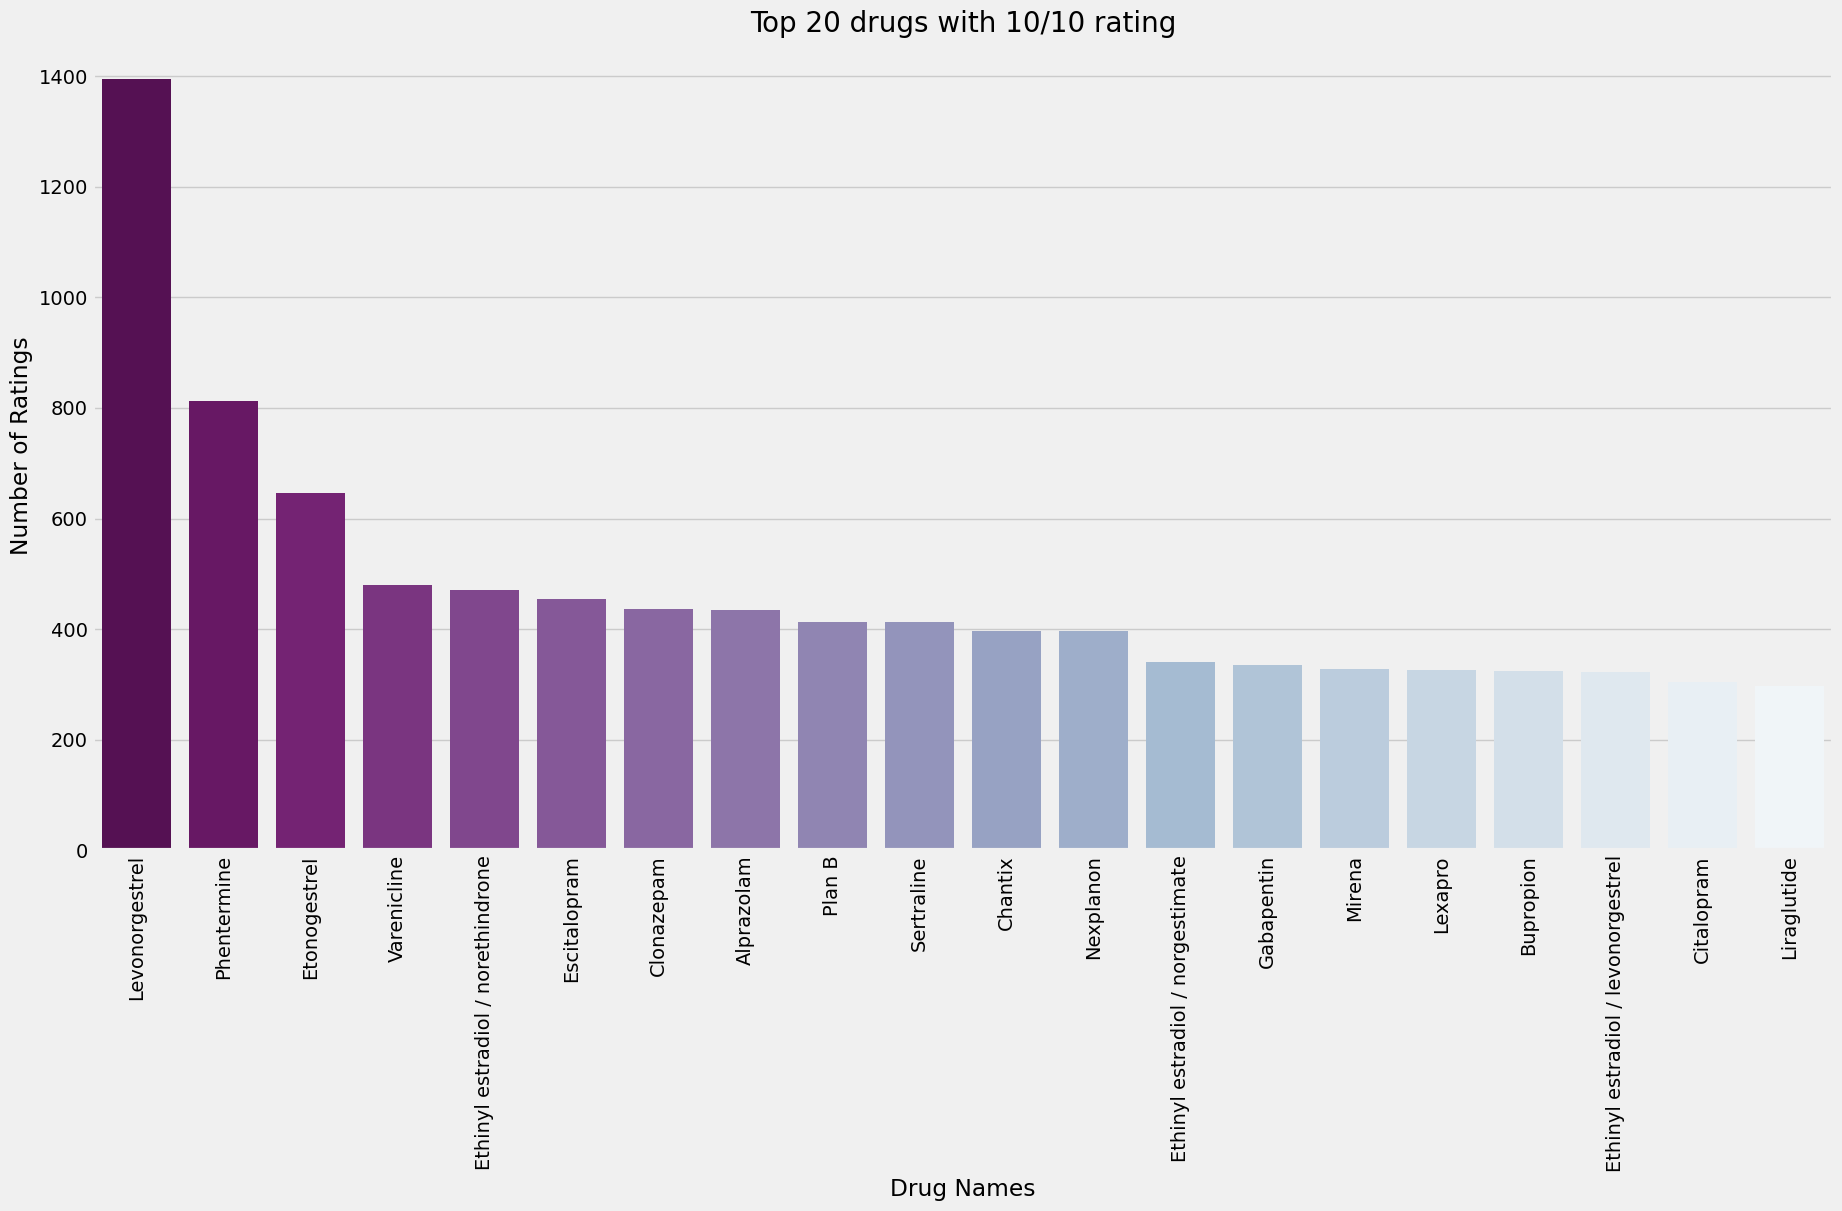

In [52]:
# Top 20 Drugs on basis of ratings (Most Popular)
plt.figure(figsize=(20,10))
rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'BuPu_r')


sns_rating.set_title('Top 20 drugs with 10/10 rating', fontsize=20)
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

#### Observation :

**Levonorgestrel, Phentemine, Etonogestrel** are the Durgs with the **Heighest Ratings**

C:\Users\Asus\AppData\Local\Temp\ipykernel_13848\613360077.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'viridis')


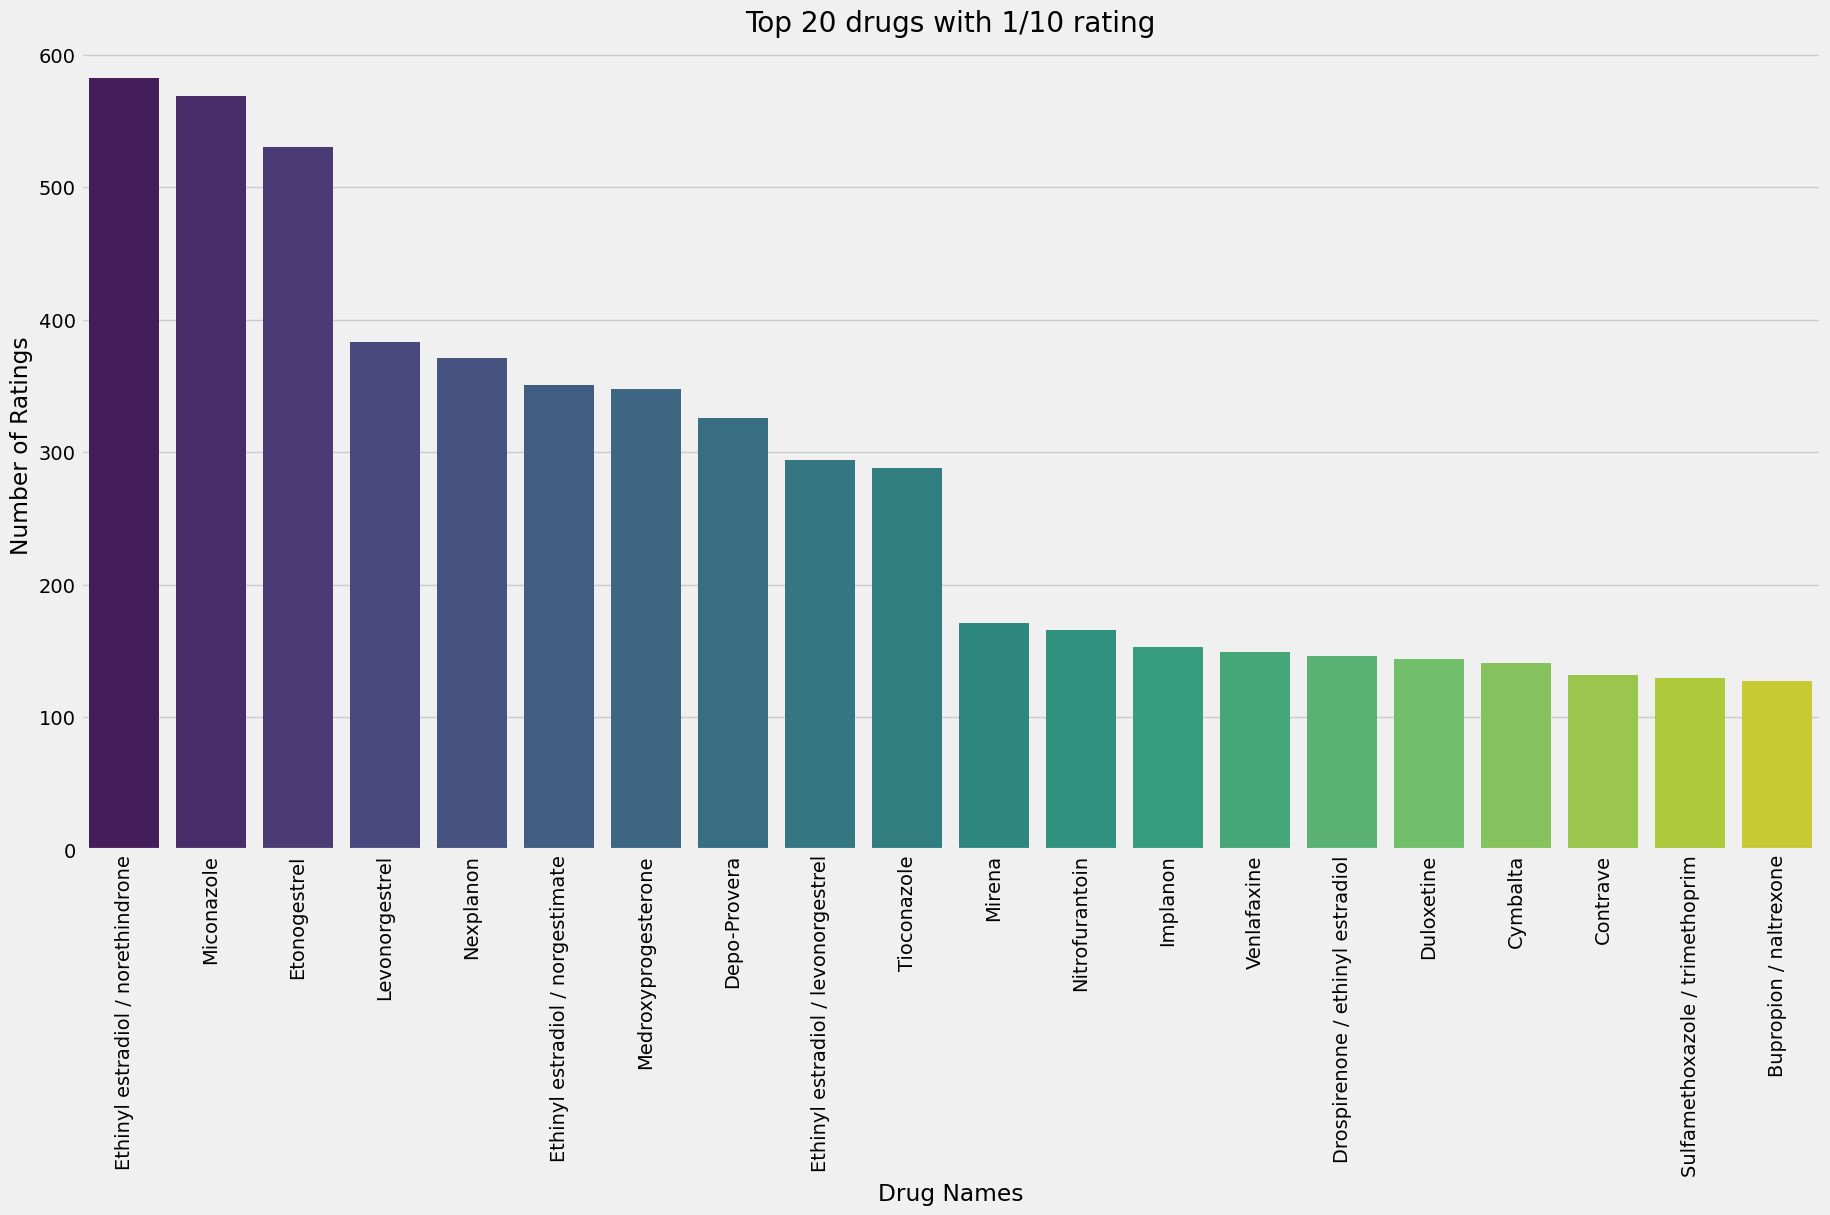

In [53]:
# Least 20 Drugs with less ratings (Most Popular)
plt.figure(figsize=(20,10))
rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'viridis')


sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

#### Observation :

**Norethindrone, Miconzole** are the Drugs with the **Least ratings** given by users

### -- What are the groups/classification of drugs used?
+ suffix or endings

In [54]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [55]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [56]:
classify_drug('valsartan')

'arb blocker'

In [57]:
df['drug_class'] = df['drugName'].apply(classify_drug)

In [58]:
df[['drugName','drug_class']]

,drugName,drug_class
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


In [59]:
# How many Groups of Drugs By Class
df['drug_class'].unique().tolist()

['arb blocker',
 None,
 'antifungal (except metronidazole)',
 'oral hypoglycemics',
 'opiod analgesics',
 'antibiotic',
 'anti-anxiety',
 'h2 blockers (anti-ulcers)',
 'beta blockers',
 'ace inhibitor',
 'thrombolytics',
 'alpha blocker',
 'corticosteroid (prednisone)',
 'antipyschotics (phenothiazine)',
 'antibiotic(penicillins)',
 'barbiturate',
 'calcium channel blocker',
 'anesthetic',
 'pituitary hormone',
 'antibiotic (cephalosporins)',
 'beta blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [60]:
# How many Groups of Drugs By Class
grp_drugs = len(df['drug_class'].unique().tolist())
print('Groups of Drugs by Class:',grp_drugs)

Groups of Drugs by Class: 23


### -- Which class of Drug is the most common ?

In [61]:
# Which of class of drug  is the most commonest
df['drug_class'].value_counts()

drug_class
antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: count, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_13848\1459703246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns_1 = sns.countplot(df['drug_class'], palette = 'spring')


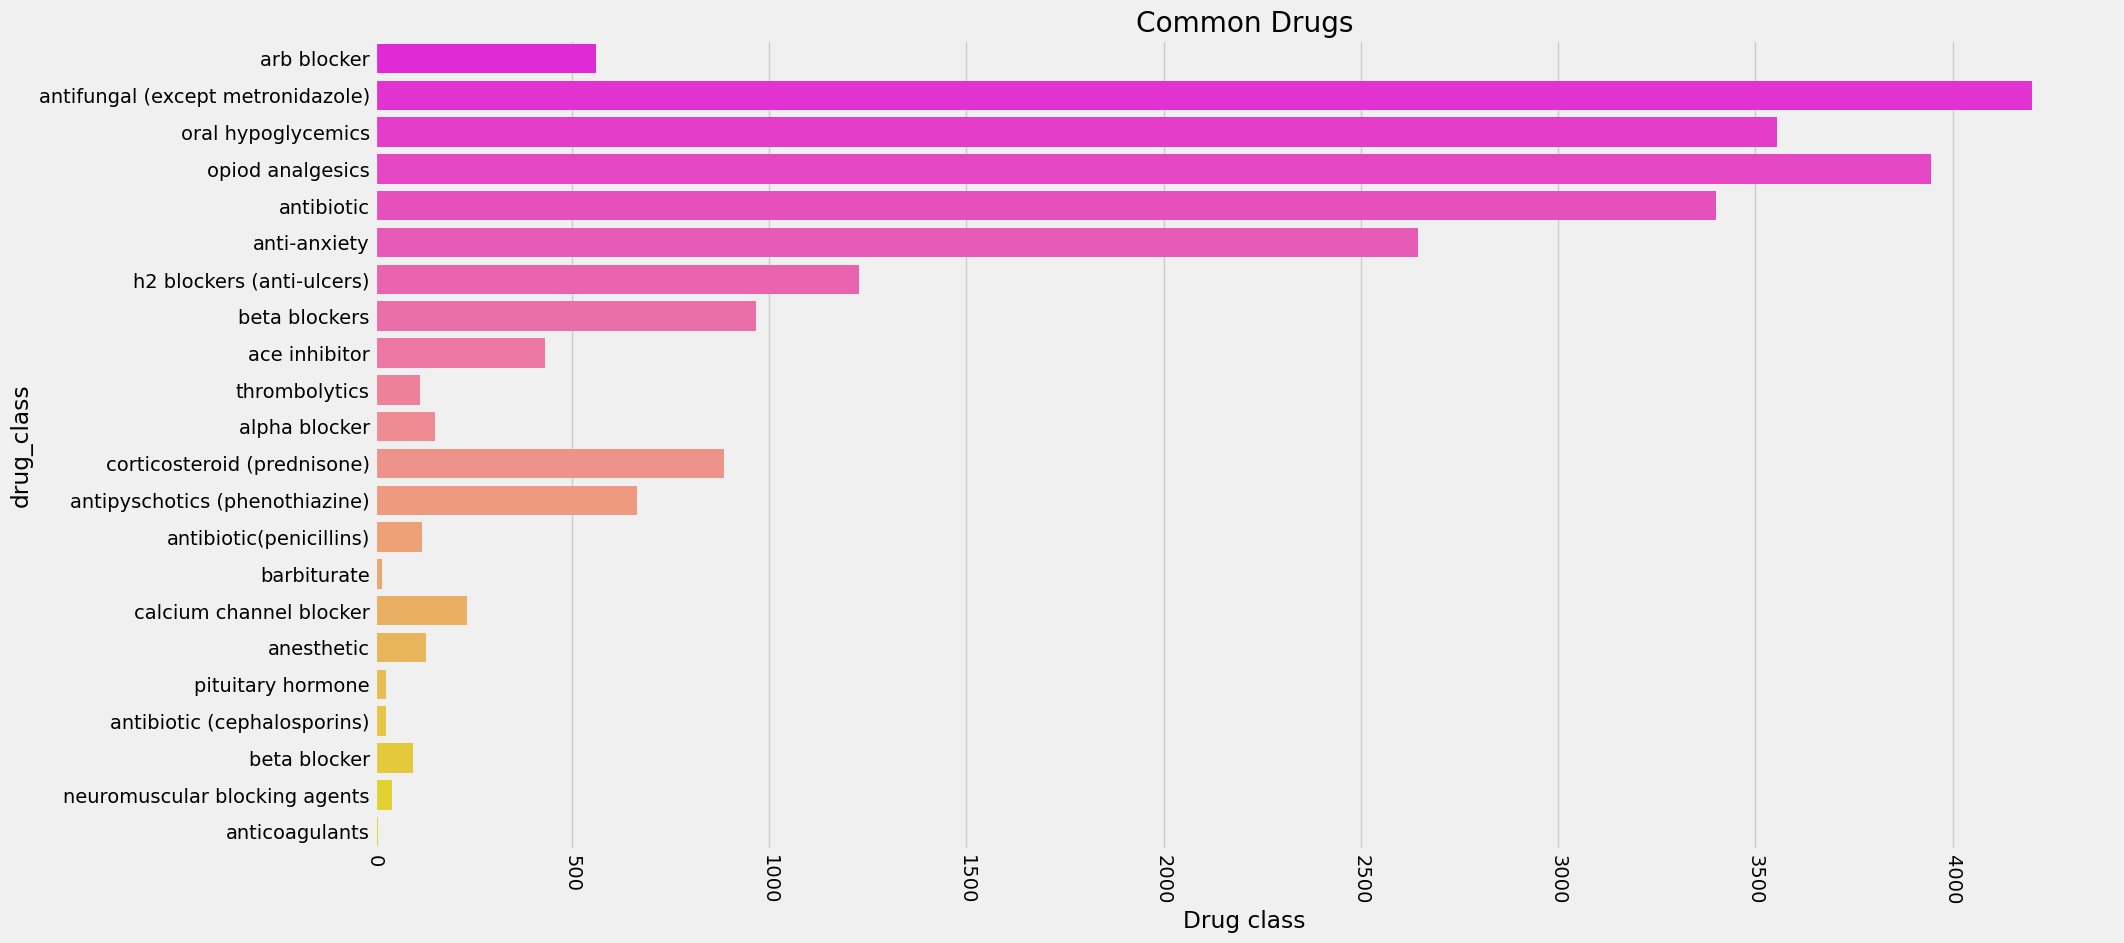

In [62]:
# Which of class of drug  is the most commonest

plt.figure(figsize=(20,10))
sns_1 = sns.countplot(df['drug_class'], palette = 'spring')
    
sns_1.set_title('Common Drugs')
sns_1.set_xlabel("Rating")
sns_1.set_xlabel("Drug class")
plt.setp(sns_1.get_xticklabels(), rotation=270)
plt.show()

#### Observations :

+ The most commonest class/group of drugs used are 
    - **Antifungal**
    - **Opiod Analgesics(Pain Killers)**
    - **Oral Hypoglycemics (DM)**
    - **Antibiotic**

### -- Distribution of Drugs(class) Per Drug Group based on size

In [63]:
# Distribution of Drugs Per Drug Group based on size
drug_groups = df.groupby('drug_class').size()

In [64]:
type(drug_groups)

pandas.core.series.Series

In [65]:
# Convert to DF
# Method 1
drug_groups.to_frame()

,0
drug_class,
ace inhibitor,432
alpha blocker,153
anesthetic,129
anti-anxiety,2645
antibiotic,3401
antibiotic (cephalosporins),29
antibiotic(penicillins),119
anticoagulants,9
antifungal (except metronidazole),4201


In [66]:
# Convert to DF
# Method 2
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})

C:\Users\Asus\AppData\Local\Temp\ipykernel_13848\2567752150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_1 = sns.barplot(data=drug_groups_df,x='drug_class',y='counts', palette = 'spring')
C:\Users\Asus\AppData\Local\Temp\ipykernel_13848\2567752150.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_1.set_xticklabels(drug_groups_df['drug_class'].values,rotation=90)


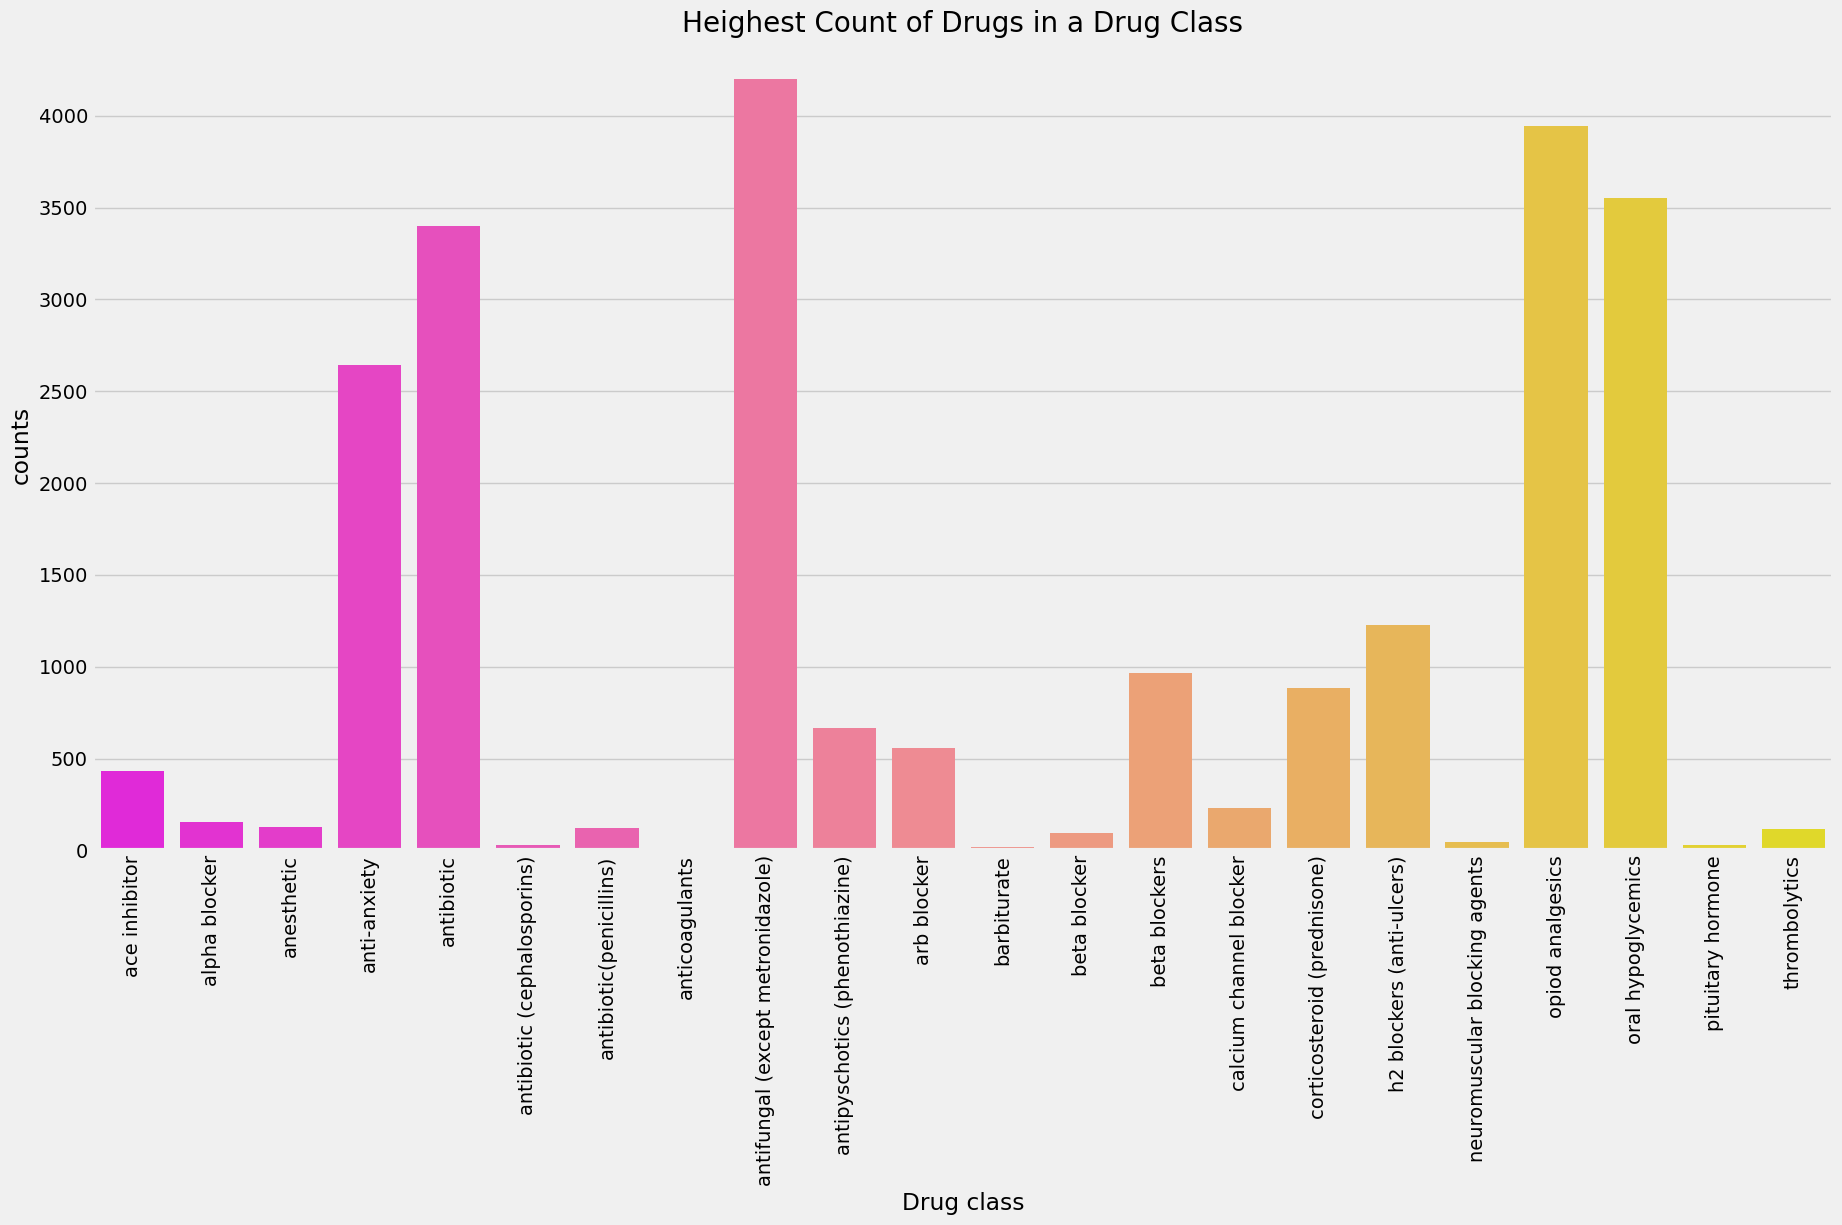

In [67]:
# Seaborn Plot
plt.figure(figsize=(20,10))
# g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts', palette='gnuplot_r')

sns_1 = sns.barplot(data=drug_groups_df,x='drug_class',y='counts', palette = 'spring')
    
sns_1.set_title('Heighest Count of Drugs in a Drug Class', fontsize=20)
sns_1.set_xlabel("count")
sns_1.set_xlabel("Drug class")


sns_1.set_xticklabels(drug_groups_df['drug_class'].values,rotation=90)
plt.show()

#### Observations :

Here we can see **Antifungal, Opiod Analgesics, Oral Hypoglycemeics** is the Drug Class with **heighest count of Drugs**


### -- How many Conditions are suffered by patients?

In [68]:
len(df['condition'].unique().tolist())

885

#### Observation :

+ We have 885 different conditions

In [69]:
#### Distribution of Conditions
df['condition'].value_counts()

condition
Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: count, Length: 884, dtype: int64

### -- Most common condition suffered

In [70]:
#### Most commonest Conditions
common_conditions = df['condition'].value_counts().nlargest(20)

In [71]:
# Change the Variable Name
new = pd.DataFrame({'drug_class':common_conditions.index,'counts':common_conditions.values})

C:\Users\Asus\AppData\Local\Temp\ipykernel_13848\2454987588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_1 = sns.barplot(data=new,x='drug_class',y='counts', palette = 'Blues_r')


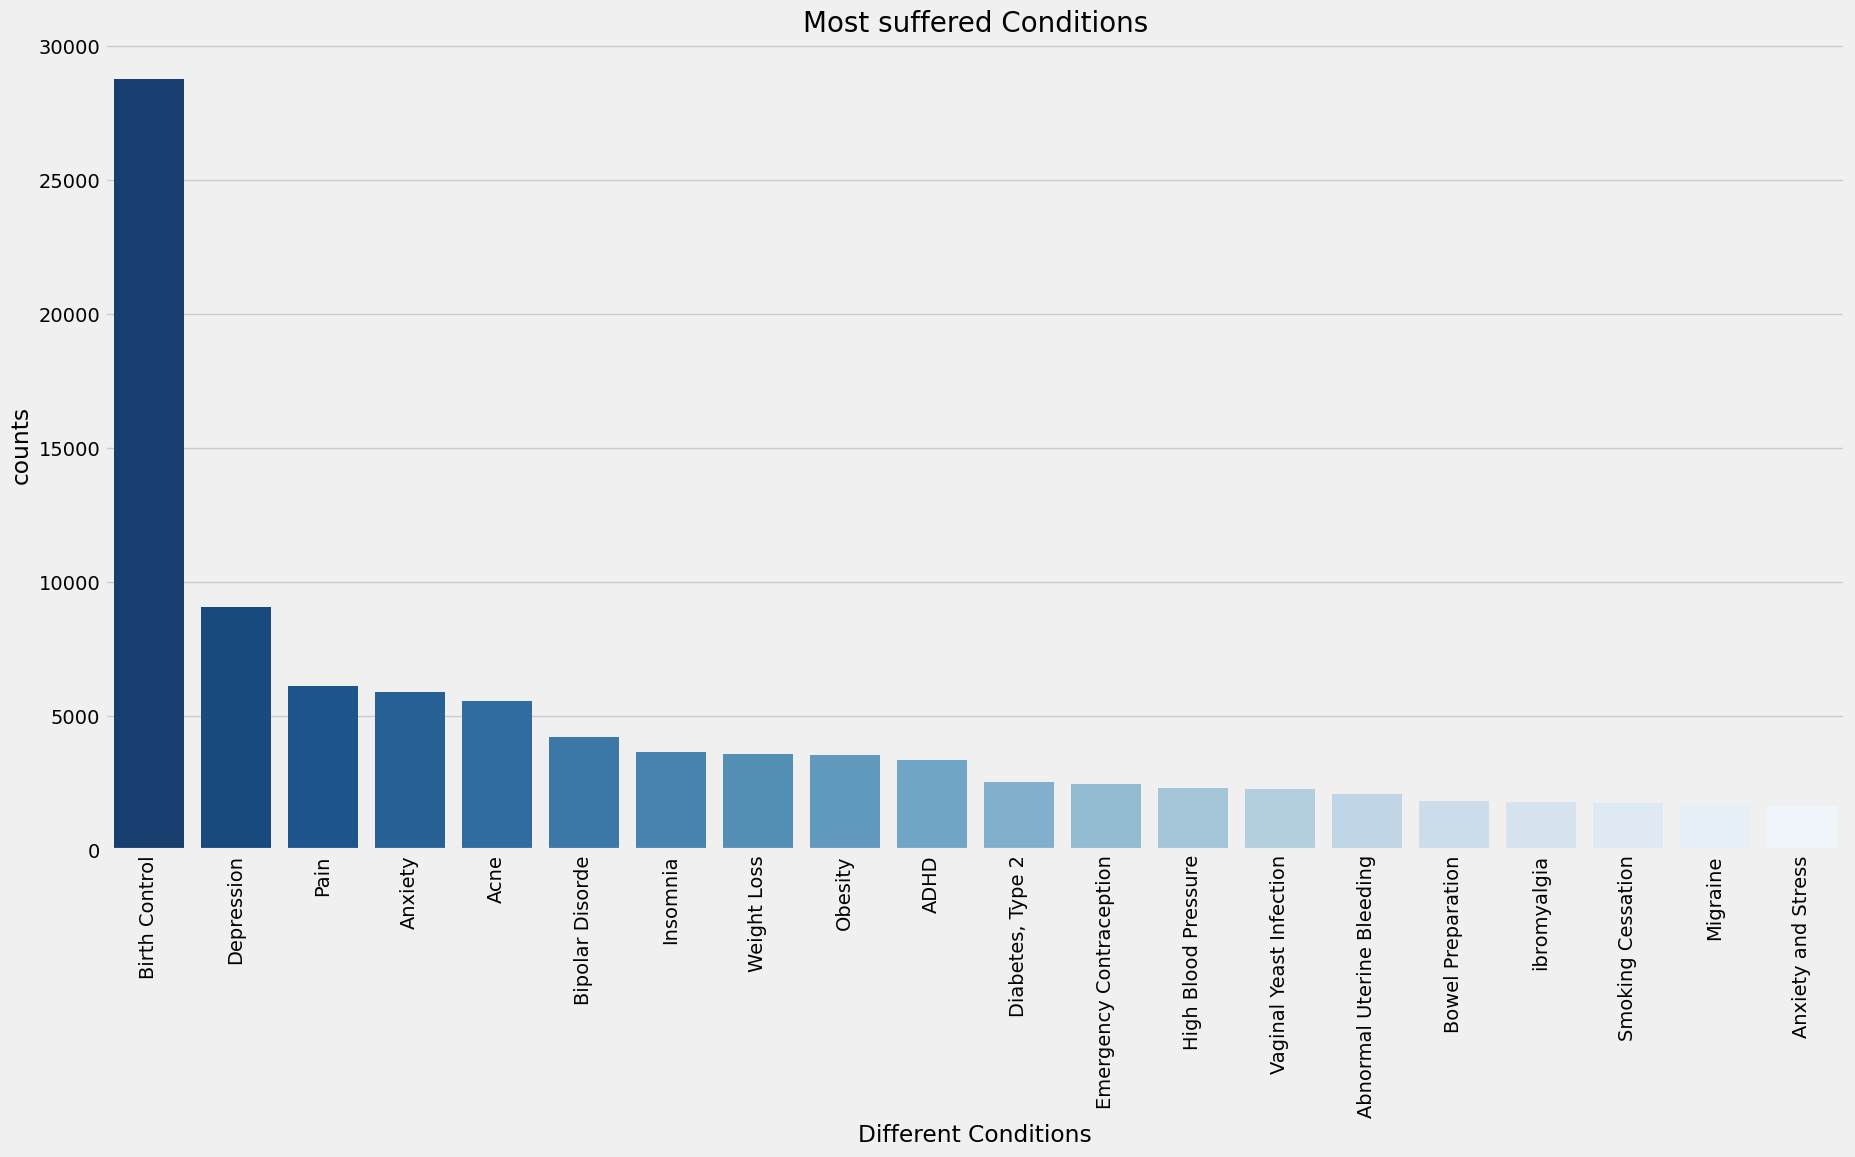

In [72]:
#### Most commonest Conditions
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=new,x='drug_class',y='counts', palette = 'Blues_r')
    
sns_1.set_title('Most suffered Conditions', fontsize=20)
sns_1.set_xlabel("Rating")
sns_1.set_xlabel("Different Conditions")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

#### Observations :
+ The most commonest condition is **Birth Control**,followed by **Depression** and **Pain and Anxiety**
+ Makes sense as compared to the drug distribution

### -- Least common Condition suffered

In [73]:
df['condition'].value_counts().nsmallest(20)

condition
Meningococcal Meningitis Prophylaxis                     1
mist (                                                   1
Cluster-Tic Syndrome                                     1
Syringomyelia                                            1
Gestational Diabetes                                     1
Aspergillosis, Aspergilloma                              1
Pseudogout, Prophylaxis                                  1
Portal Hypertension                                      1
Reversal of Nondepolarizing Muscle Relaxants             1
47</span> users found this comment helpful.              1
Short Stature for Age                                    1
Neurotic Depression                                      1
Cerebral Edema                                           1
me                                                       1
Hyperuricemia Secondary to Chemotherapy                  1
Prevention of Perinatal Group B Streptococcal Disease    1
Small Bowel or Pancreatic Fistula             

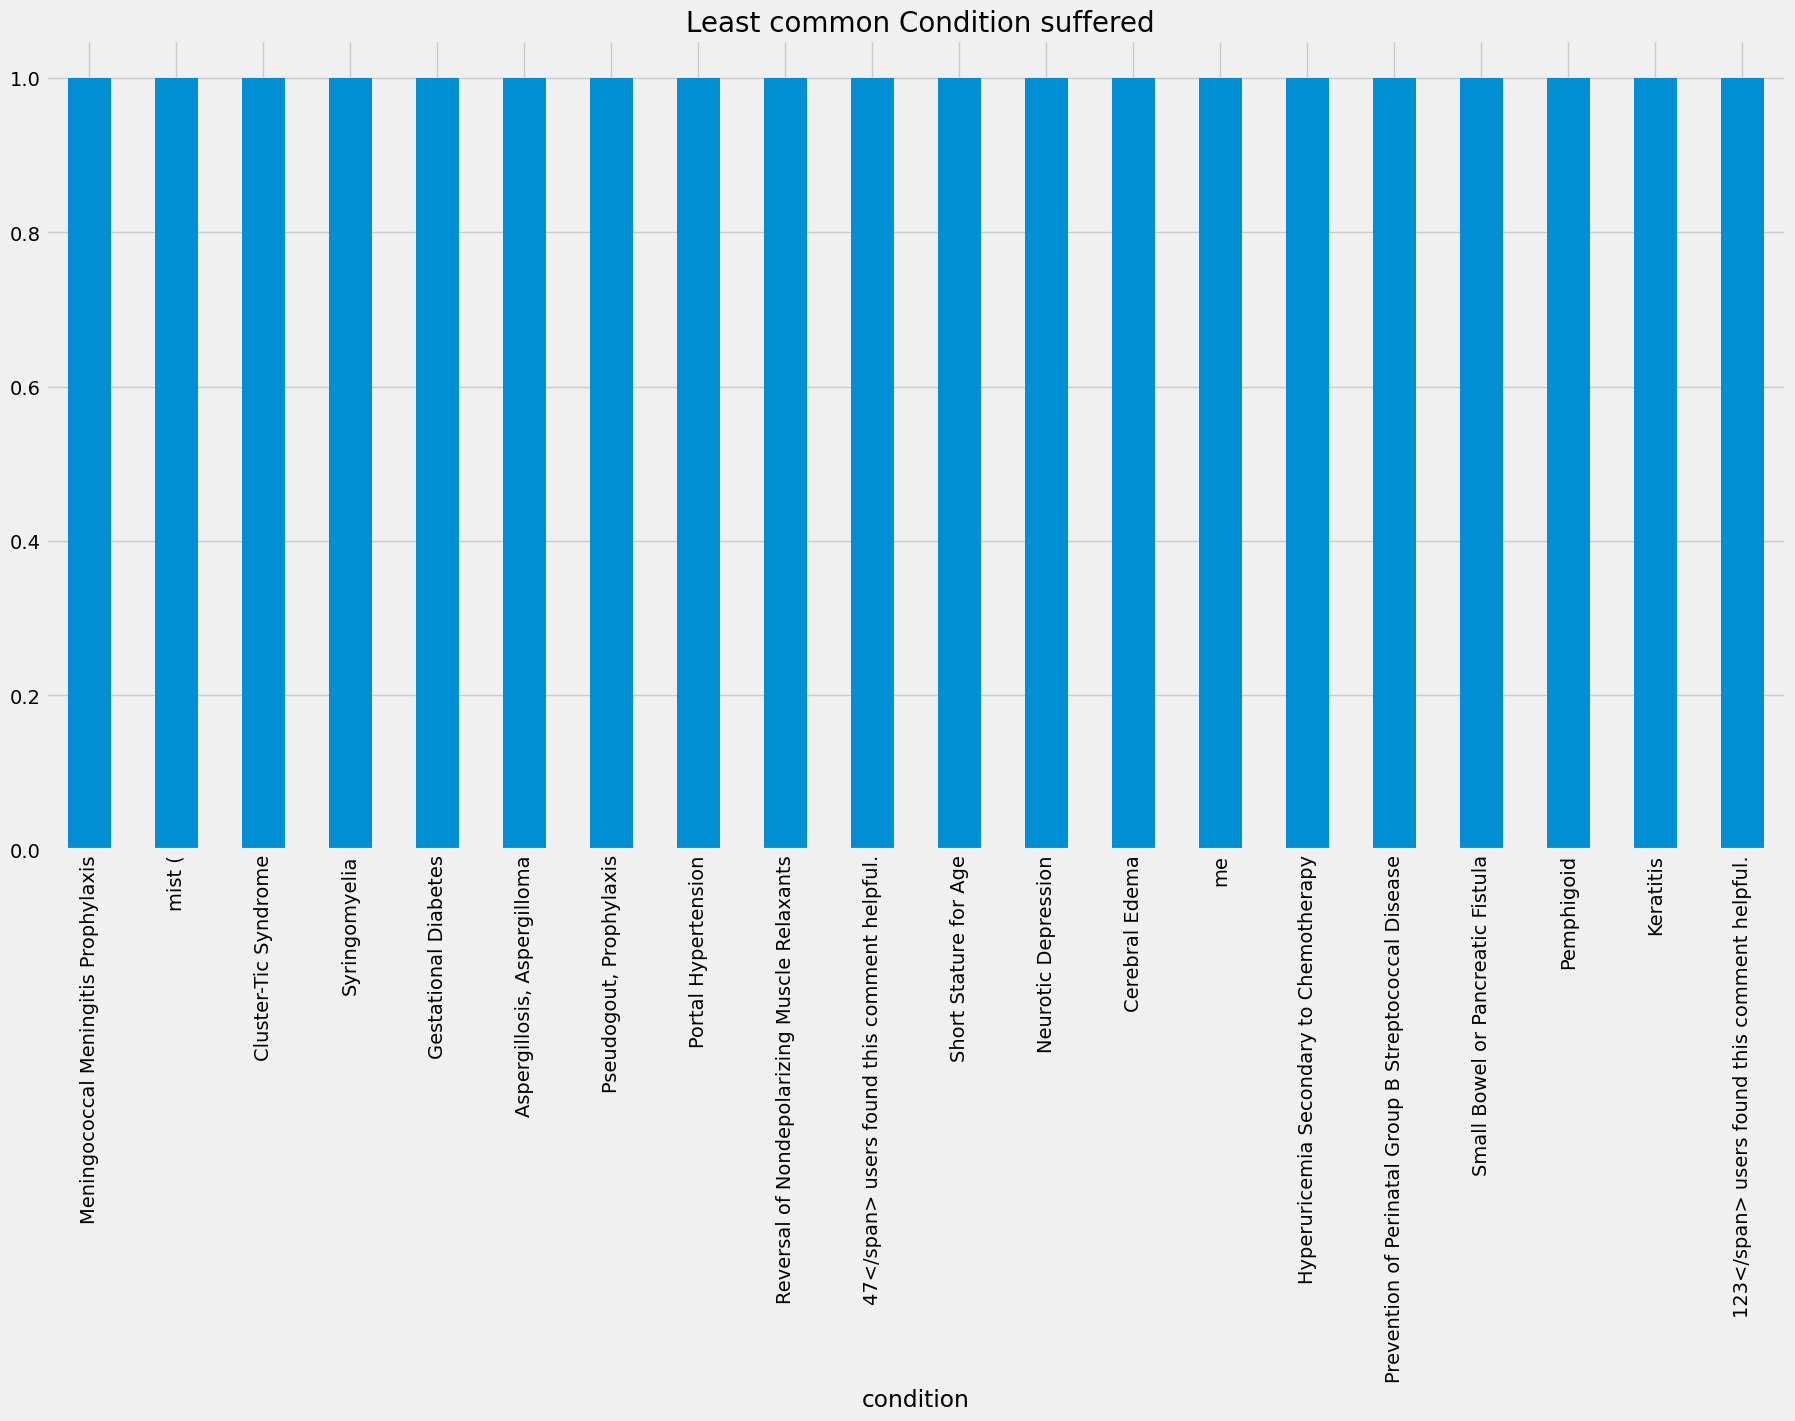

In [74]:
#### Least commonest Conditions
df['condition'].value_counts().nsmallest(20).plot(kind='bar',figsize=(20,10))
plt.title(' Least common Condition suffered', fontsize=20)
plt.show()

### -- How many type of Drugs per condition (Top 20)

In [75]:
drug_per_cond = df.groupby('condition')['drugName'].nunique().nlargest(20)

In [76]:
drug_per_cond_df = pd.DataFrame({'drug_class':drug_per_cond.index,'counts':drug_per_cond.values})

C:\Users\Asus\AppData\Local\Temp\ipykernel_13848\1305914663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_1 = sns.barplot(data=drug_per_cond_df,x='drug_class',y='counts', palette = 'Blues_r')


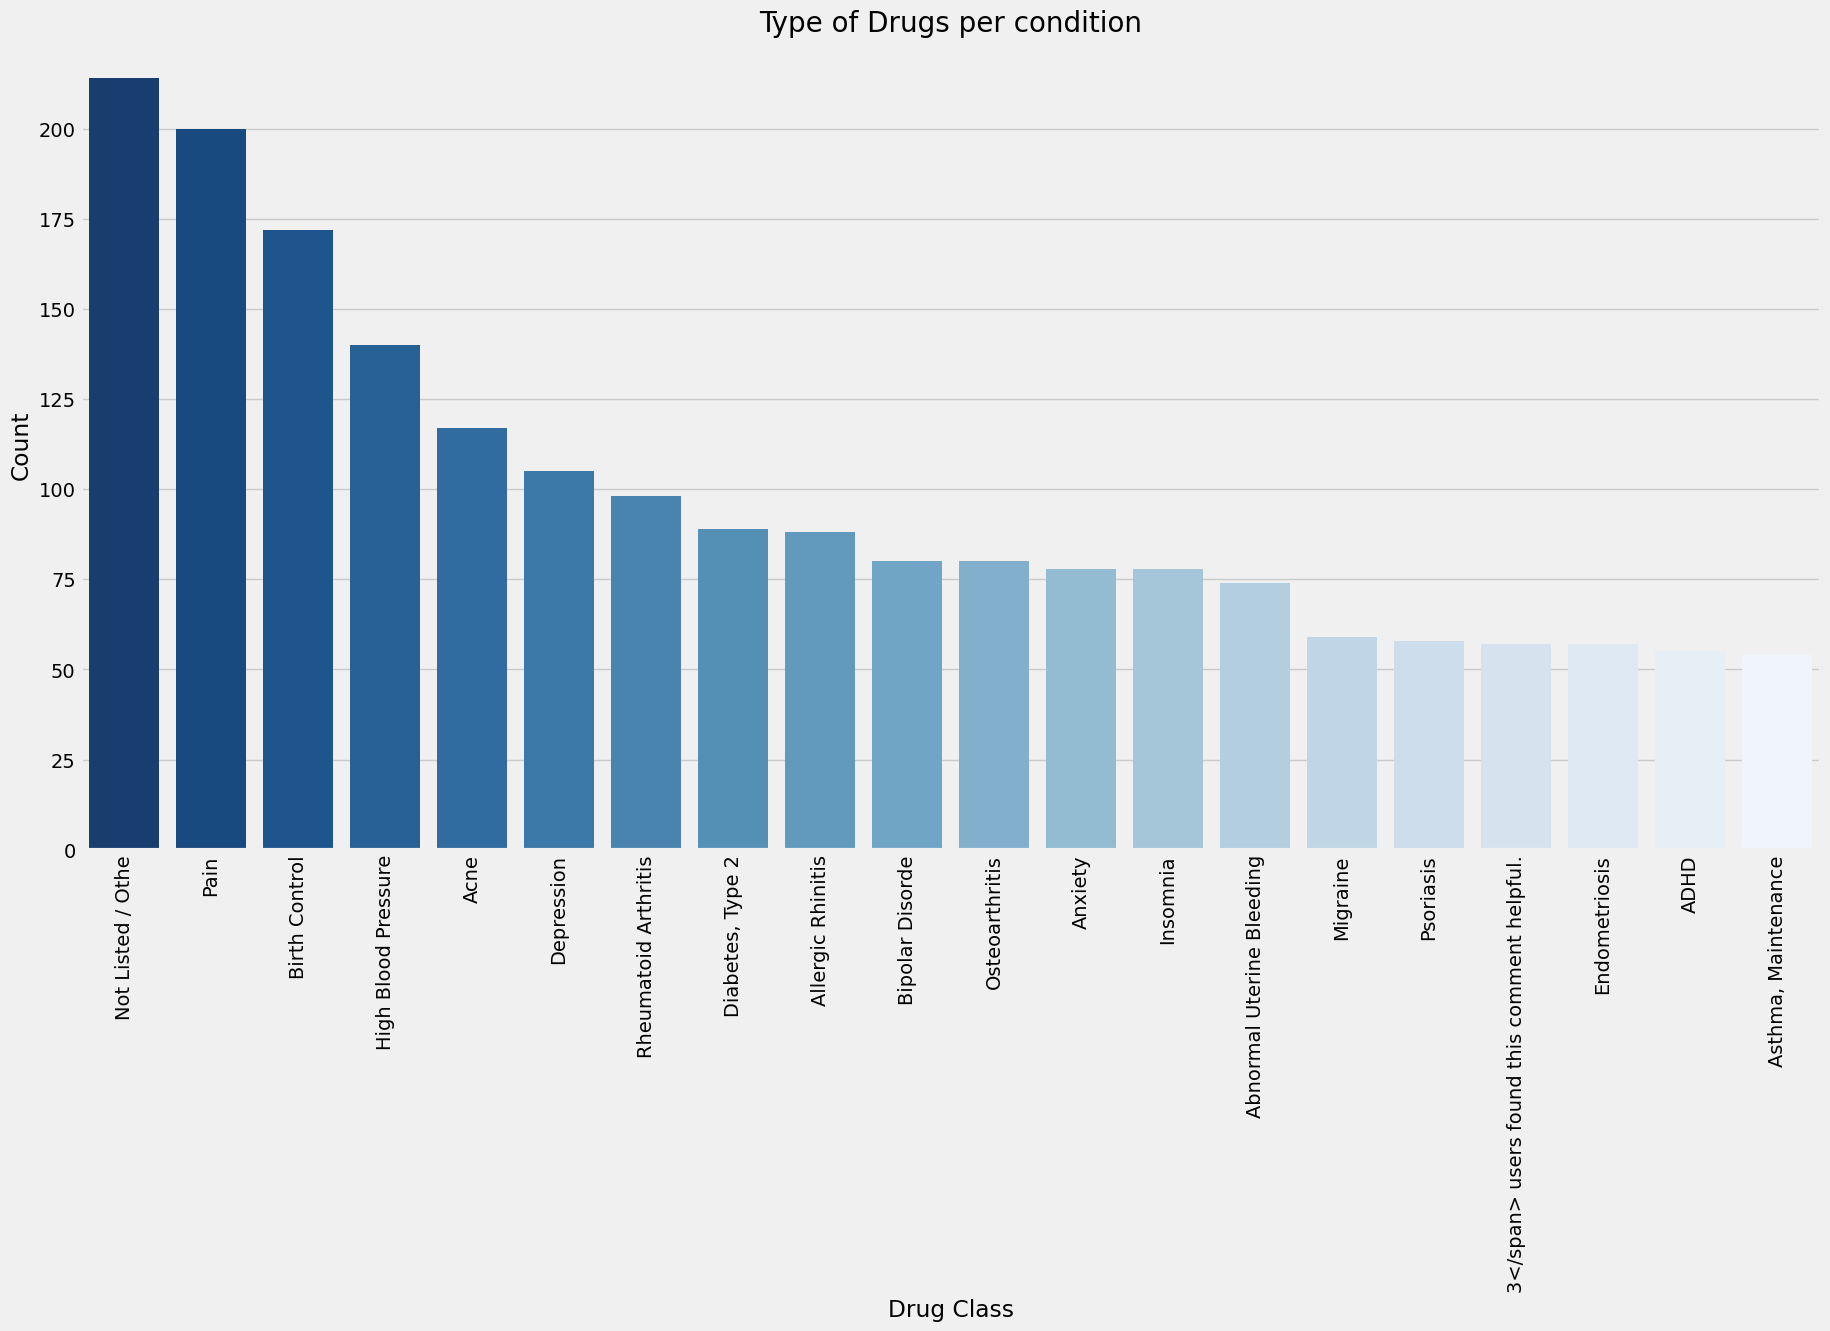

In [77]:
# How many Drugs per condition (Top 20)
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=drug_per_cond_df,x='drug_class',y='counts', palette = 'Blues_r')
    
sns_1.set_title('Type of Drugs per condition', fontsize=20)
sns_1.set_xlabel("Drug Class")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

#### Observation :

+ **Pain, Birth Control** and **HBP** have the highest number of different/unique drugs for their condition


### -- Distrubtion of Rating given by Users

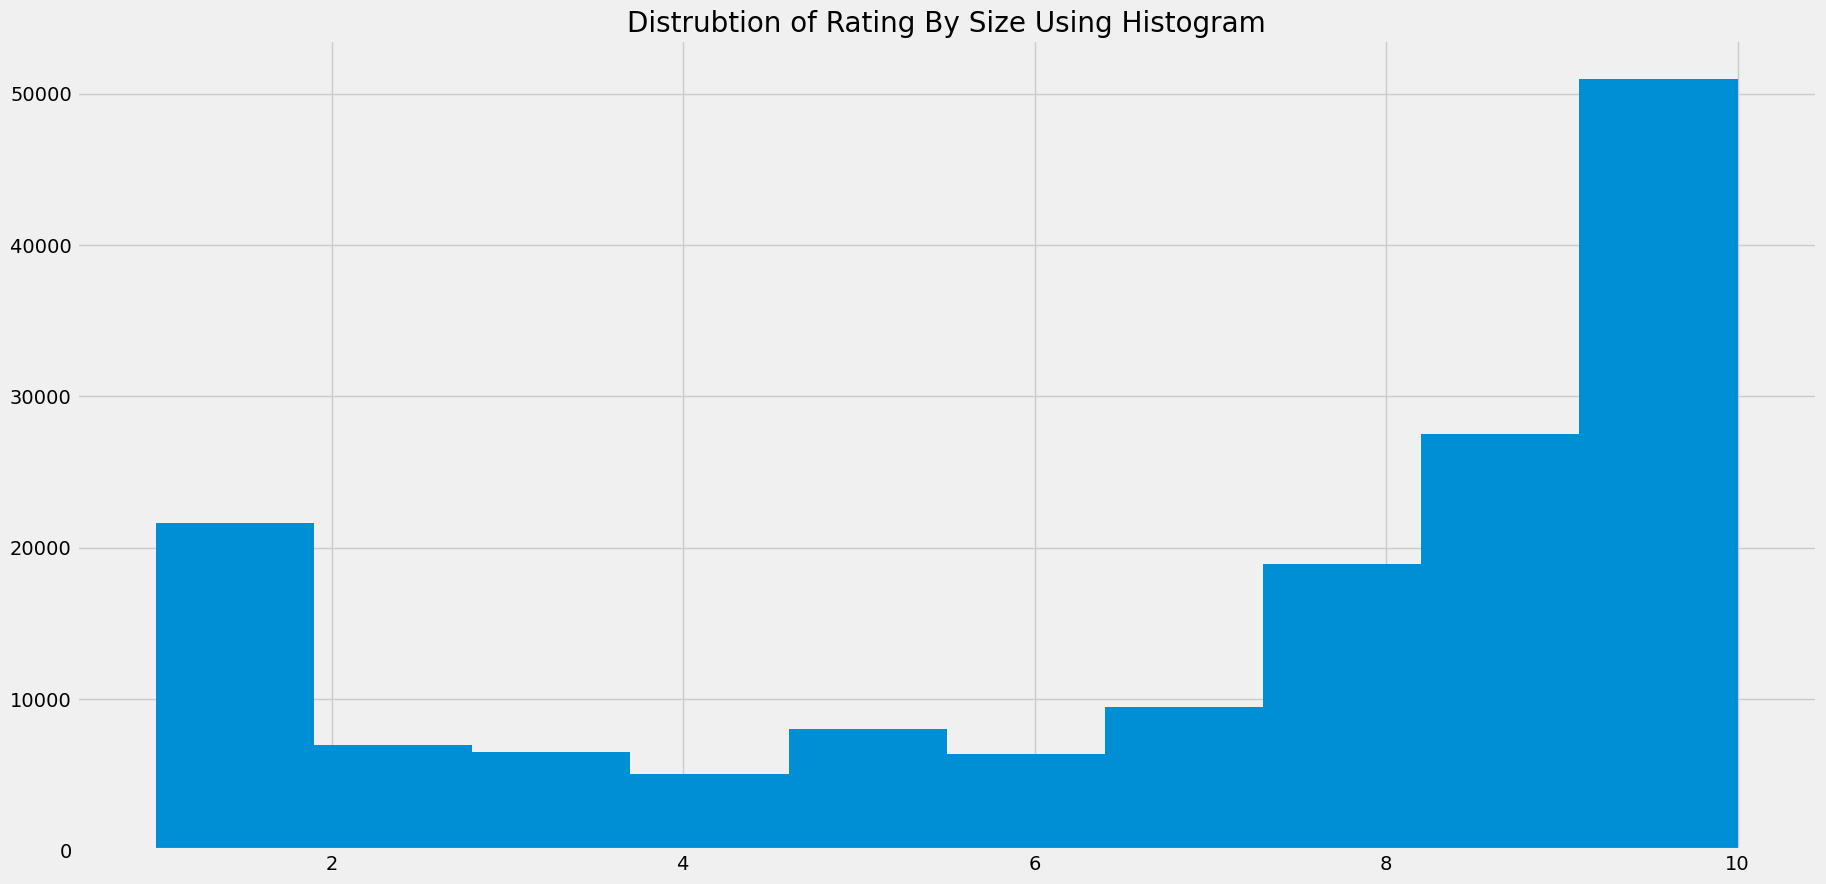

In [78]:
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.title("Distrubtion of Rating By Size Using Histogram", fontsize=20)
plt.show()

#### Observation :
+ Most people rated at the **extremes i.e (0 and 10)**

### -- Average Rating of Drugs

In [79]:
# Average Rating of Drugs
avg_rating = (df['rating'].groupby(df['drugName']).mean())
avg_rating

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

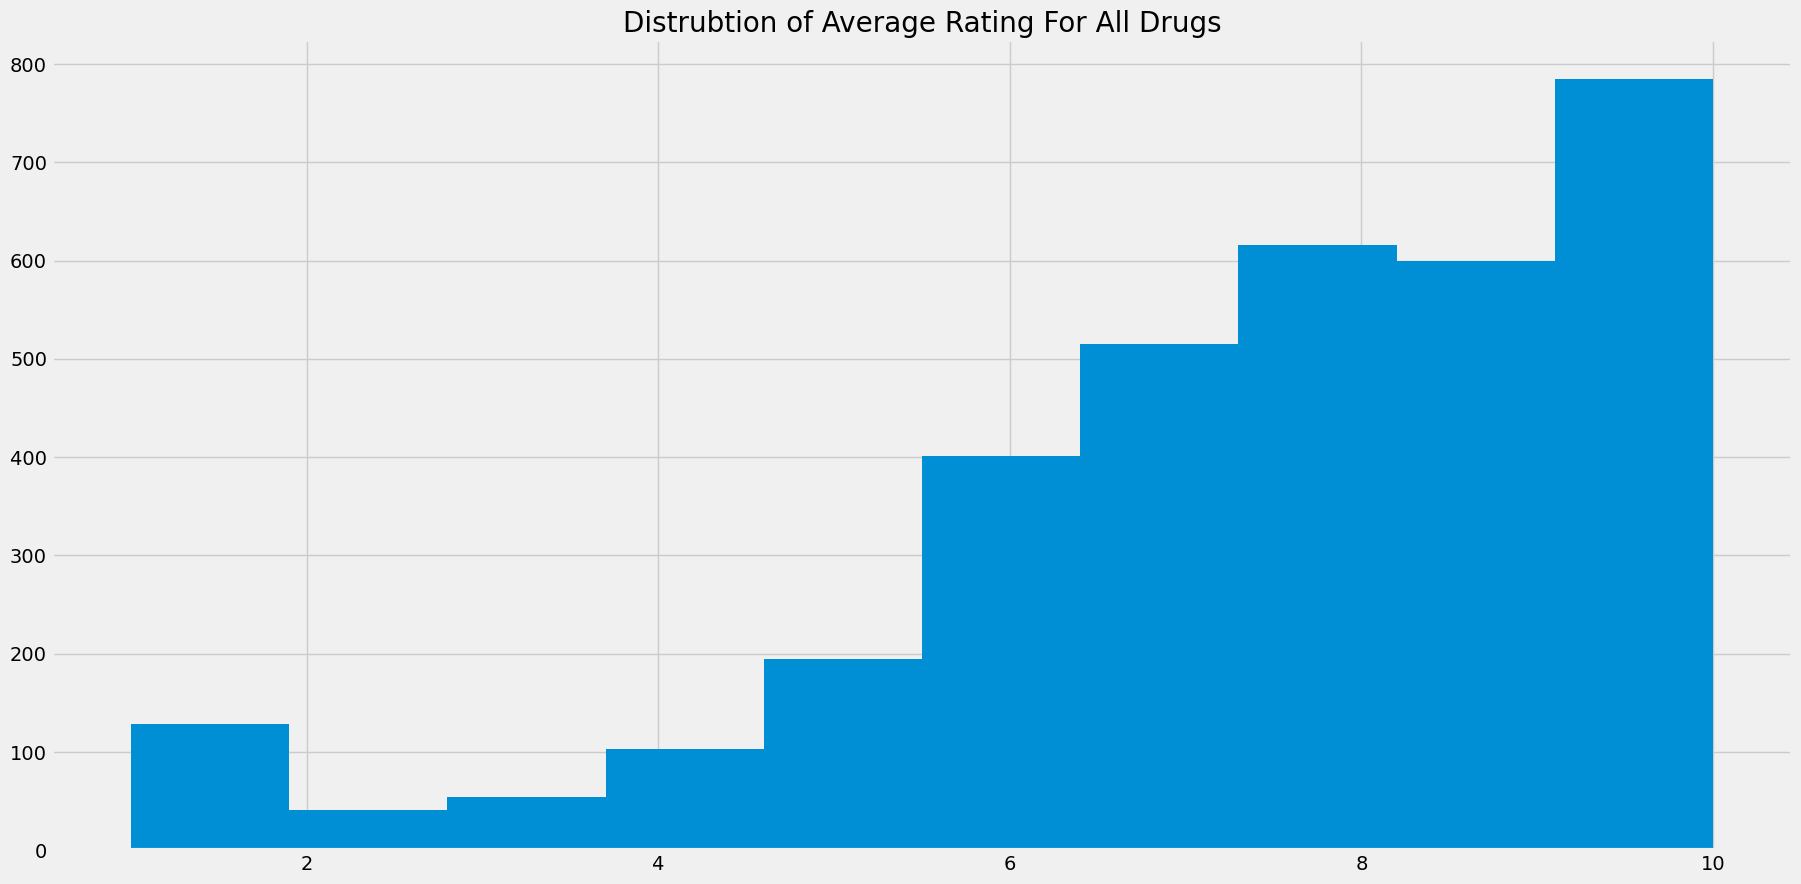

In [80]:
# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs", fontsize=20)
plt.show()

#### Observation :

The **Majority of Rating** given by the users are **from 6 to 10**

## Insights on Date Column :

#### Transforming date columns

In [81]:
# converting the date into datetime format
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# extracting year from date
df['Year'] = df['date'].dt.year

# extracting the month from the date
df['month'] = df['date'].dt.month

# extracting the days from the date
df['day'] = df['date'].dt.day

C:\Users\Asus\AppData\Local\Temp\ipykernel_13848\3266507147.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors = 'coerce')


### -- Number of Reviews each Year

In [ ]:
plt.figure(figsize=(20,10))
sns_=sns.countplot(df['Year'], palette ='winter_r')
    
plt.title('The No. of Reviews each year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))

# Fix the warning by specifying x and data parameters
sns.countplot(x='Year', data=df, palette='winter_r', legend=False)

plt.title('The No. of Reviews Each Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count of Reviews', fontsize=15)
plt.show()


#### Observations :

From above plot we can see that **Year 2016 had the heighest number of reviews** followed by **Year 2017 and 2015**

### -- Number of Reviews each Month

In [ ]:
plt.figure(figsize=(20,10))
sns_=sns.countplot(df['month'], palette ='magma')


plt.title('The No. of Reviews each Month', fontsize = 25)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

#### Observations :

**August** month has the heighest reviwes **followed by October** month.

In [ ]:
plt.figure(figsize=(20,10))
sns_=sns.countplot(df['day'], palette ='tab20c')

    
plt.title('The No. of Reviews each day', fontsize = 22)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

### -- How genuine is the review? (Using sentiment analysis)

In [ ]:
from textblob import TextBlob

In [ ]:
df['review'].head()

In [48]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [49]:
# text fxn
get_sentiment("I love apples")

0.5

In [50]:
# text fxn
get_sentiment_label("I love apples")

'positive'

In [51]:
# Sentiment Score for Review
df['sentiment'] = df['review'].apply(get_sentiment)

In [52]:
# Sentiment Labels for Review
df['sentiment_label'] = df['review'].apply(get_sentiment_label)

In [54]:
df[['review','sentiment','sentiment_label']].head()

,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,neutral
1,"""My son is halfway through his fourth week of ...",0.168333,positive
2,"""I used to take another oral contraceptive, wh...",0.067210,positive
3,"""This is my first time using any form of birth...",0.179545,positive
4,"""Suboxone has completely turned my life around...",0.194444,positive


### -- How many positive and negative and neutral reviews?

In [55]:
df['sentiment_label'].value_counts()

positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

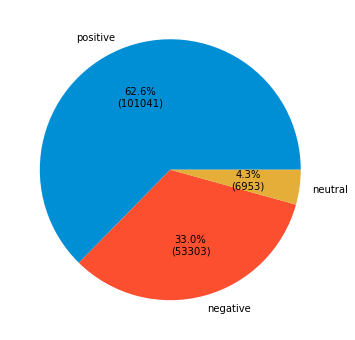

In [56]:
plt.figure(figsize=(12,6))

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['sentiment_label'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.show()

#### Obserevation :

We can see that Majority of reviews given by users are **Positive(62.6%)** and **Negative(33%)**, while **Neutral reviews are (4.3%)**

### -- Correlation Between Our sentiment and rating

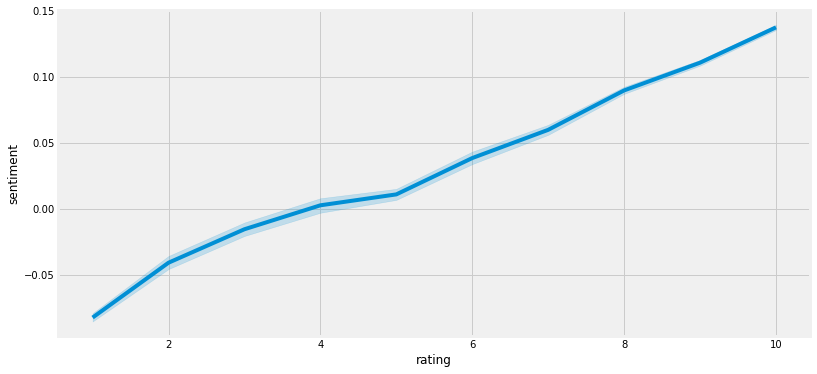

In [57]:
#### Correlation Between Our sentiment and rating
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='rating',y='sentiment')
plt.show()

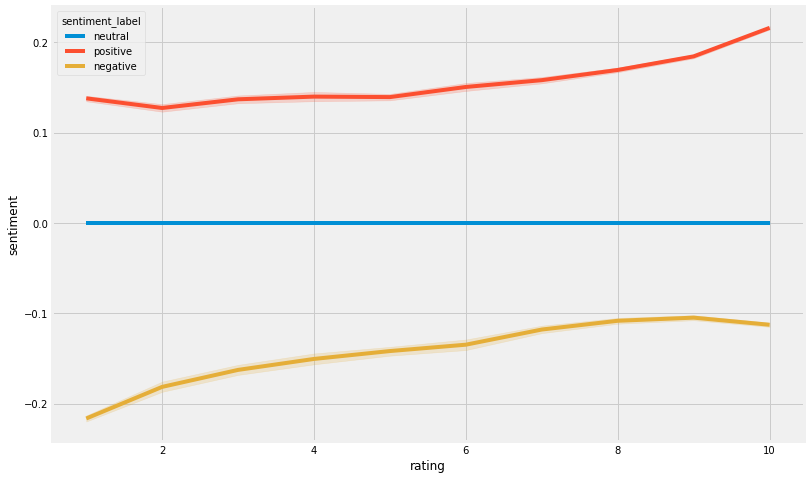

In [58]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')
plt.show()

### Observation :
* The positive Ratings are increasing gradually which indicates that the patients are getting better by the use of the prescribed Drugs
* The Negative Ratings are decreasing which is a good sign that the Drugs given to patients are effective


### -- How many reviews are genuine as compared to the rating
+ Genuine **good rating** =positive + rating 10-6
+ Genuine **bad rating** = negative + rating 4-1

In [59]:
# Genuine Good  Rating Per Review
good_review =  len(df[(df['rating'] >= 6) & (df['sentiment_label'] == 'positive')])
print('According to Sentiment and Rating the number of Good Ratings are :', good_review)

According to Sentiment and Rating the number of Good Ratings are : 81044


In [60]:
# Genuine Bad  Rating Per Review
bad_review = len(df[(df['rating'] <= 4) & (df['sentiment_label'] == 'negative')])
print('According to Sentiment and Rating the number of Good Ratings are :', bad_review)

According to Sentiment and Rating the number of Good Ratings are : 21995


In [61]:
# df.groupby('drugName')['usefulCount'].value_counts()

### -- Top Drugs name Per UsefulCount

In [62]:
drug_usefulcount = df.groupby('drugName')['usefulCount'].nunique().nlargest(20)

In [63]:
drug_usefulcount_df = pd.DataFrame({'drug_name':drug_usefulcount.index,'counts':drug_usefulcount.values})

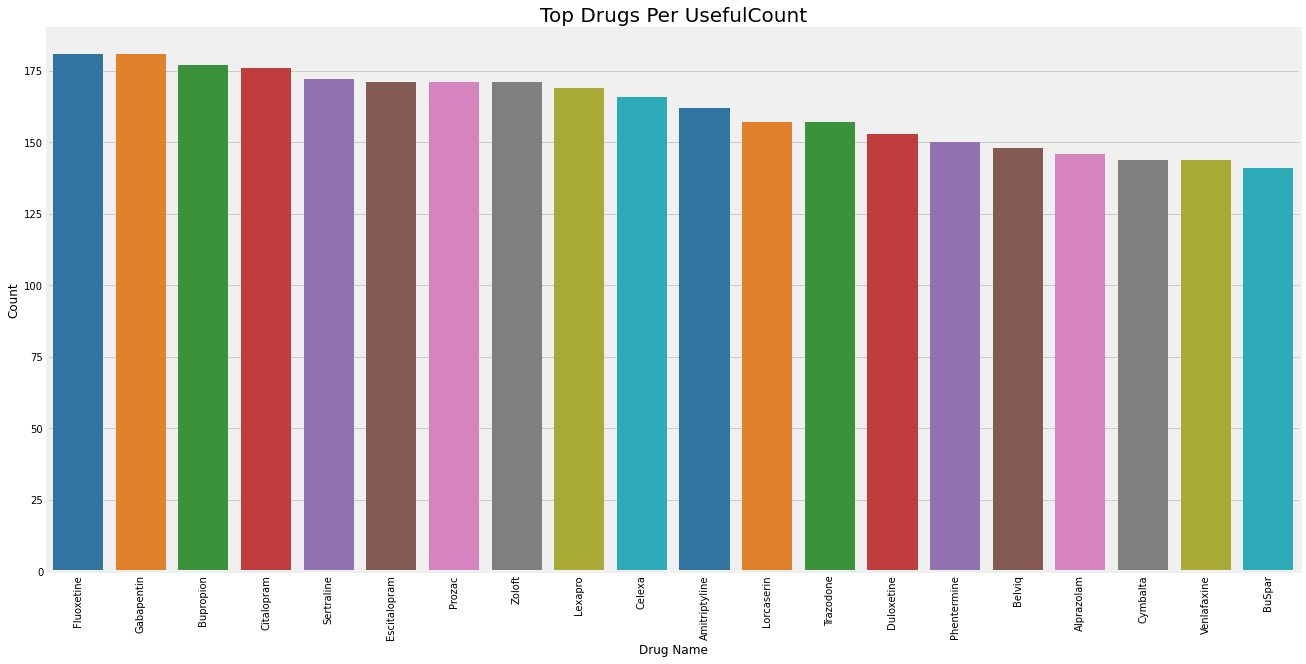

In [64]:
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=drug_usefulcount_df,x='drug_name',y='counts', palette = 'tab10')
    
sns_1.set_title('Top Drugs Per UsefulCount', fontsize=20)
sns_1.set_xlabel("Drug Name")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

### Observation :

**Fluoxetine, Gabapentin** and **Bupropion** are the Drugs which are most useful for treating people

### -- Top Drug Class per UsefulCount

In [65]:
# Top Drugs Class Per UsefulCount
drug_class_usefulcount = df.groupby('drug_class')['usefulCount'].nunique().nlargest(20)

In [66]:
drug_class_usefulcount_df = pd.DataFrame({'drug_class':drug_class_usefulcount.index,'counts':drug_class_usefulcount.values})

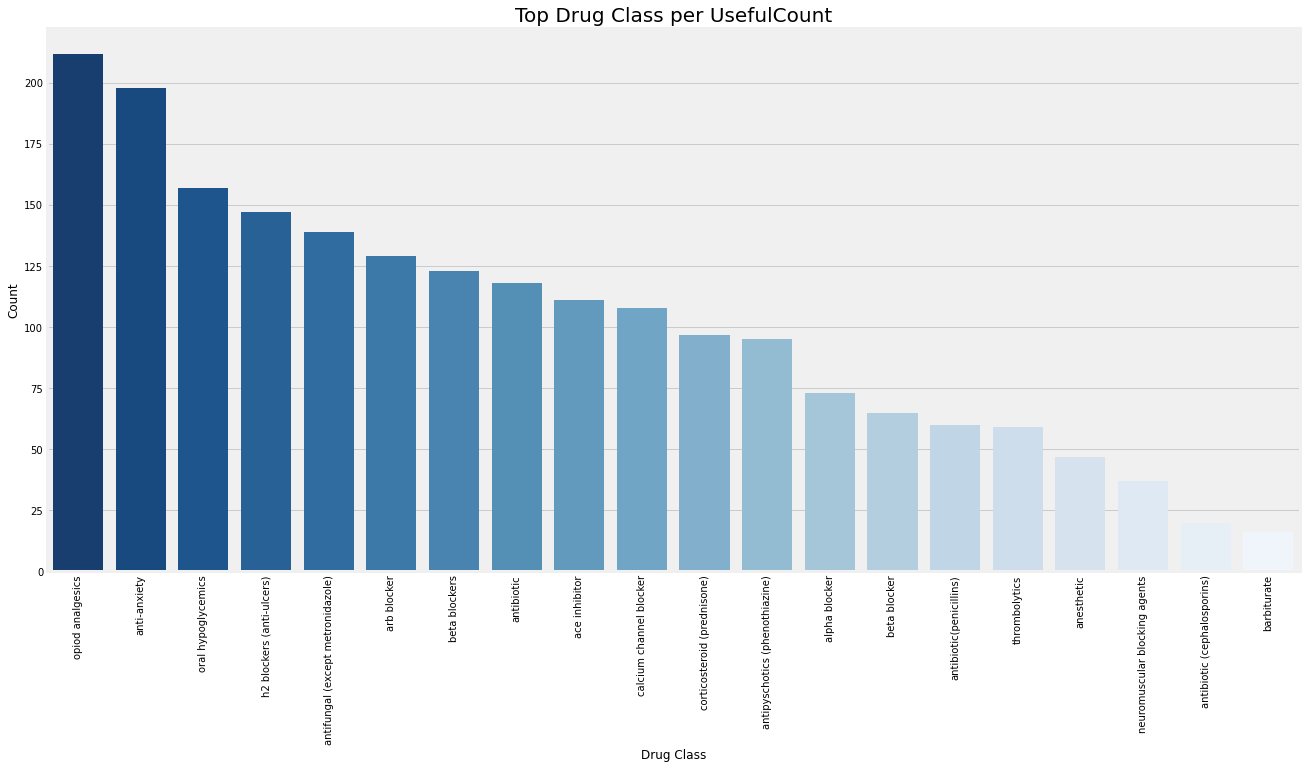

In [67]:
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=drug_class_usefulcount_df,x='drug_class',y='counts', palette = 'Blues_r')
    
sns_1.set_title('Top Drug Class per UsefulCount', fontsize=20)
sns_1.set_xlabel("Drug Class")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

### Observations :

**Opiod analgesics, anti-anxiety** and **oral hypoglycemics** are the top 3 Drug Classes used to treat the people

### -- Least Useful Drug Class 

In [68]:
# Top Drugs Class Per UsefulCount
least_drug_class_usefulcount = df.groupby('drug_class')['usefulCount'].nunique().nsmallest(20)

In [69]:
least_drug_class_usefulcount_df = pd.DataFrame({'drug_class':least_drug_class_usefulcount.index,'counts':least_drug_class_usefulcount.values})

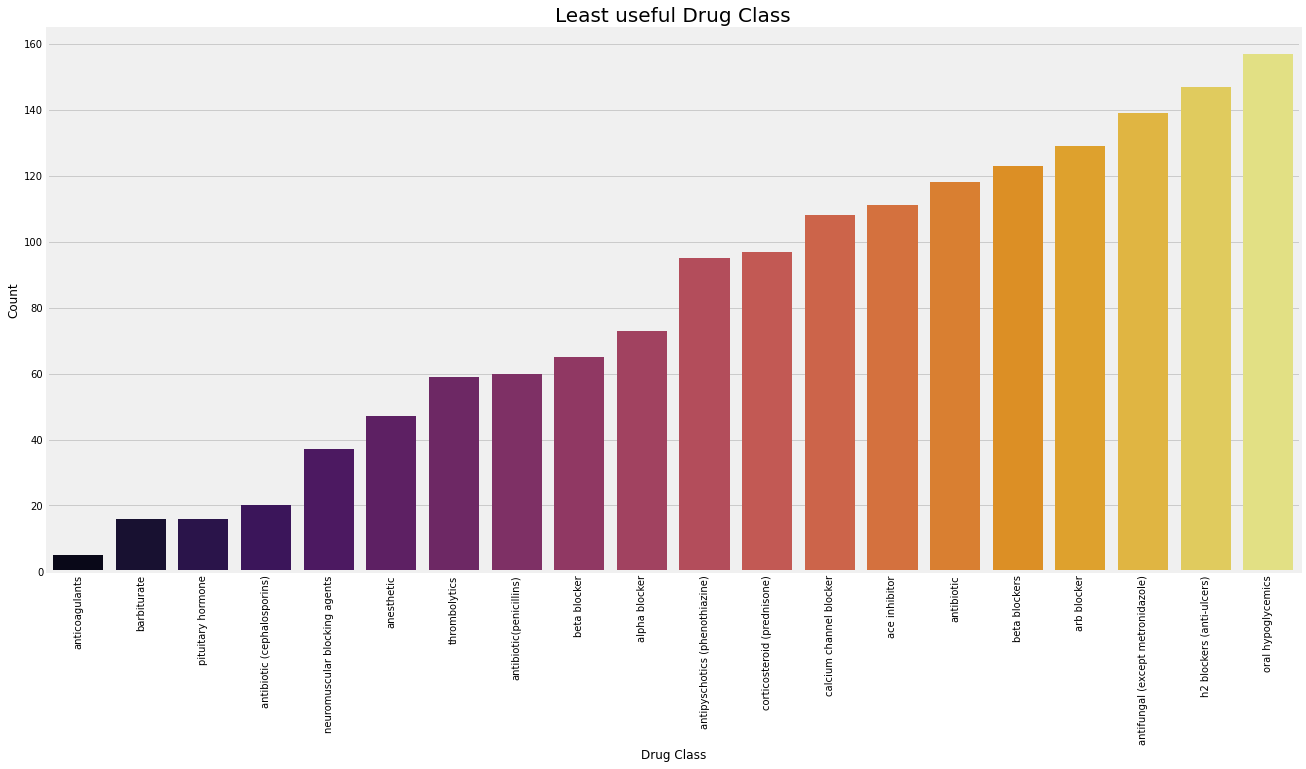

In [70]:
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=least_drug_class_usefulcount_df,x='drug_class',y='counts', palette = 'inferno')
    
sns_1.set_title('Least useful Drug Class', fontsize=20)
sns_1.set_xlabel("Drug Class")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

### Observation :

**Anticoagulant, barbiturate** and **pitutary harmone** is the Least used Drug Class for perscribed for peoples

<AxesSubplot:xlabel='rating', ylabel='usefulCount'>

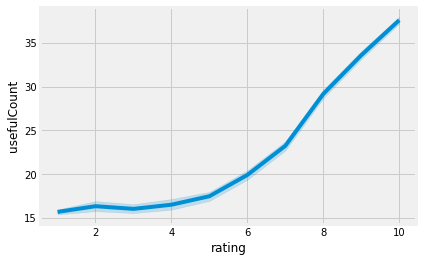

In [71]:
### Correlation between Rating and Usefulcount
sns.lineplot(data=df,x='rating',y='usefulCount')

### Observation :
+ As the rating goes up the usefulcount goes up

# Using Hugging face transformations

In [53]:
# Install transformers and datasets:

!pip install transformers datasets

In [72]:
# Call libraries:
# Hugging Face related:

from transformers import pipeline
from datasets import load_dataset
from datasets import Dataset
import re

In [73]:
# Display multiple commands outputs from a cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Text used
<p>I am a 25 year old female. I was diagnosed with bipolar II disorder about 5 years ago. I have been taking 150mg of lamotrigine for over 2 years. Thus far I have experienced significant improvements in controlling my bipolar II disorder. I recently paired 100mg of sertraline to improve the lows. Also, I experience rapid cycling. I rated this drug 70% as I feel I still have a long way to go in recovery. But, the drug has definitely allowed me to be a highly functioning individual.</p>

# Question Answering

In [74]:
# Instantiate question-answer object:

question_answerer = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layers were used when initializing TFDistilBertForQuestionAnswering.

All the layers of TFDistilBertForQuestionAnswering were initialized from the model checkpoint at distilbert-base-cased-distilled-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForQuestionAnswering for predictions without further training.


In [75]:
# Let the object study context and answer question:

question_answerer(
    question="What is the age of female who gave this rebiew?",
    context="I am a 25 year old female. I was diagnosed with bipolar II disorder about 5 years ago. I have been taking 150mg of lamotrigine for over 2 years. Thus far I have experienced significant improvements in controlling my bipolar II disorder. I recently paired 100mg of sertraline to improve the lows. Also, I experience rapid cycling. I rated this drug 70% as I feel I still have a long way to go in recovery. But, the drug has definitely allowed me to be a highly functioning individual."
)

{'score': 0.770075798034668, 'start': 7, 'end': 9, 'answer': '25'}

In [76]:
# Another question with same context:

question_answerer(
    question="Which disease she was diagnosed?",
    context="I am a 25 year old female. I was diagnosed with bipolar II disorder about 5 years ago. I have been taking 150mg of lamotrigine for over 2 years. Thus far I have experienced significant improvements in controlling my bipolar II disorder. I recently paired 100mg of sertraline to improve the lows. Also, I experience rapid cycling. I rated this drug 70% as I feel I still have a long way to go in recovery. But, the drug has definitely allowed me to be a highly functioning individual."
)

{'score': 0.726047694683075,
 'start': 48,
 'end': 67,
 'answer': 'bipolar II disorder'}

In [77]:
# Another question with same context:

question_answerer(
    question="When she was diagnosed?",
    context="I am a 25 year old female. I was diagnosed with bipolar II disorder about 5 years ago. I have been taking 150mg of lamotrigine for over 2 years. Thus far I have experienced significant improvements in controlling my bipolar II disorder. I recently paired 100mg of sertraline to improve the lows. Also, I experience rapid cycling. I rated this drug 70% as I feel I still have a long way to go in recovery. But, the drug has definitely allowed me to be a highly functioning individual."
)

{'score': 0.531155526638031,
 'start': 68,
 'end': 85,
 'answer': 'about 5 years ago'}

# Text summarization

In [78]:
# Create text summarize object:
 
summarizer = pipeline("summarization")

No model was supplied, defaulted to t5-small and revision d769bba (https://huggingface.co/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
C:\Users\Yogesh\anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512

In [79]:
summarizer("I am a 25 year old female. I was diagnosed with bipolar II disorder about 5 years ago. I have been taking 150mg of lamotrigine for over 2 years. Thus far I have experienced significant improvements in controlling my bipolar II disorder. I recently paired 100mg of sertraline to improve the lows. Also, I experience rapid cycling. I rated this drug 70% as I feel I still have a long way to go in recovery. But, the drug has definitely allowed me to be a highly functioning individual.")

Your max_length is set to 200, but you input_length is only 118. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)


[{'summary_text': '25-year-old was diagnosed with bipolar II disorder about 5 years ago . recently paired 100mg of sertraline to improve the lows .'}]

# Text generation

In [80]:
# Text generation pipeline:
generator = pipeline('text-generation', model = 'gpt2')


All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [81]:
# Generate text
generator("I am a 25 year old female. I was diagnosed with bipolar II disorder about 5 years ago.", max_length = 60, num_return_sequences=3)


Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


[{'generated_text': "I am a 25 year old female. I was diagnosed with bipolar II disorder about 5 years ago. I am an alcoholic, and I'm a woman.\n\nI started doing things on my own rather than making my own medications. I wanted this medication to be as effective as I could be for"},
 {'generated_text': "I am a 25 year old female. I was diagnosed with bipolar II disorder about 5 years ago. As a result of my mood disorder, there were a lot of things she talked about to me. I felt I shouldn't talk to her anymore. So in a small way, I was able to"},
 {'generated_text': "I am a 25 year old female. I was diagnosed with bipolar II disorder about 5 years ago. I'm currently experiencing anxiety, depression, agitation, and seizures and still trying to deal with this loss. I am trying not to give up on finding people that I love so much. I am going"}]

In [82]:
############ Project Completed #############